<a href="https://colab.research.google.com/github/zakajd/deep-learning/blob/master/fastai-v3/HW1_cats_and_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data loading
Firstly, I will use fastai library to fine-tune resnet34 model to better classify images of cats and dogs in dogs-vs-cats dataset. 
1. **Stage 1**
    - Re-train only FC layers
2. **Stage 2**
    - Update weights
3. **Stage 3**
    - Download some more data from the internet and use it to extend original dataset.

In [30]:
# Don't use this if work in Colab
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

# Load fast.ai library
!curl -s https://course.fast.ai/setup/colab | bash
# Don't forget switch to GPU in Runtime -> Change Runtime type 

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'fastai-v3/'
data_dir = root_dir + 'data/'

Updating fastai...
Done.
Mounted at /content/gdrive


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
# Global constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
# path = Path('/home/zakajd/Downloads/deep-learning/data/dogs-vs-cats')

#if work in Colab, uncomment this
path = Path(data_dir + 'dogs-vs-cats/')
path_val = path/'valid'
path_test = path/'test_labeled'
path_train = path/'train'


In [38]:
# doc(untar_data)
# Path(data_dir).ls()
# tarfile.open(Path(data_dir)/'dogs-vs-cats.tar', 'r:*').extractall(data_dir)

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/dogs-vs-cats.tar'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/dogs-vs-cats')]

In [ ]:
# path = untar_data(URLs.DOGS, dest=data_dir); path

tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=IMAGE_SIZE, bs=BATCH_SIZE).normalize(imagenet_stats)

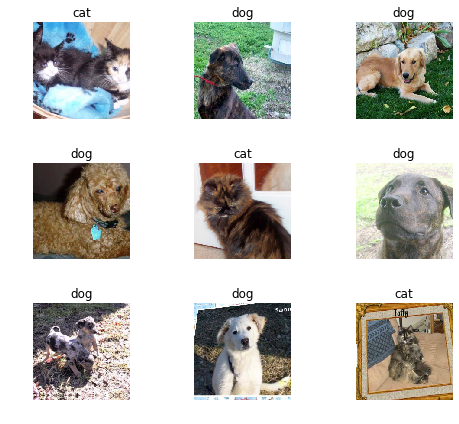

In [37]:
data.show_batch(rows=3, figsize=(7,6))

In [39]:
print(data.classes)
assert len(data.classes) == data.c

['cat', 'dog']


### Stage 1: Training ResNet34

In [40]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 78992717.79it/s]


In [41]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.067352,0.059285,0.022800,03:03
1,0.045686,0.032054,0.010400,02:57
2,0.039891,0.035598,0.011600,02:59
3,0.033047,0.031009,0.009600,03:09


In [ ]:
learn.save('stage-1')

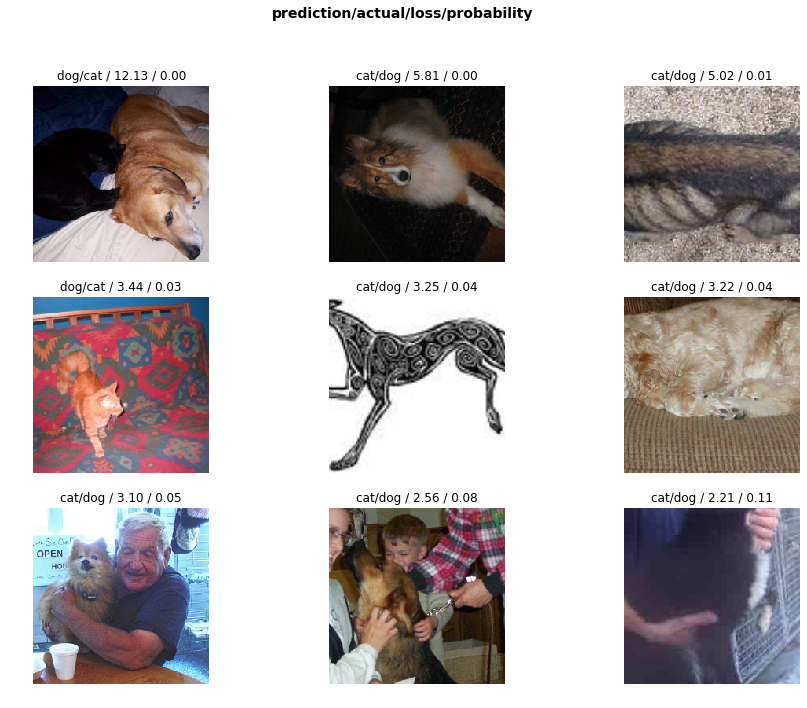

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

assert len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [ ]:
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Stage 2: Fine-tunning ResNet layers

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.033028,0.026350,0.008000,03:02
1,0.034347,0.027505,0.008800,03:02


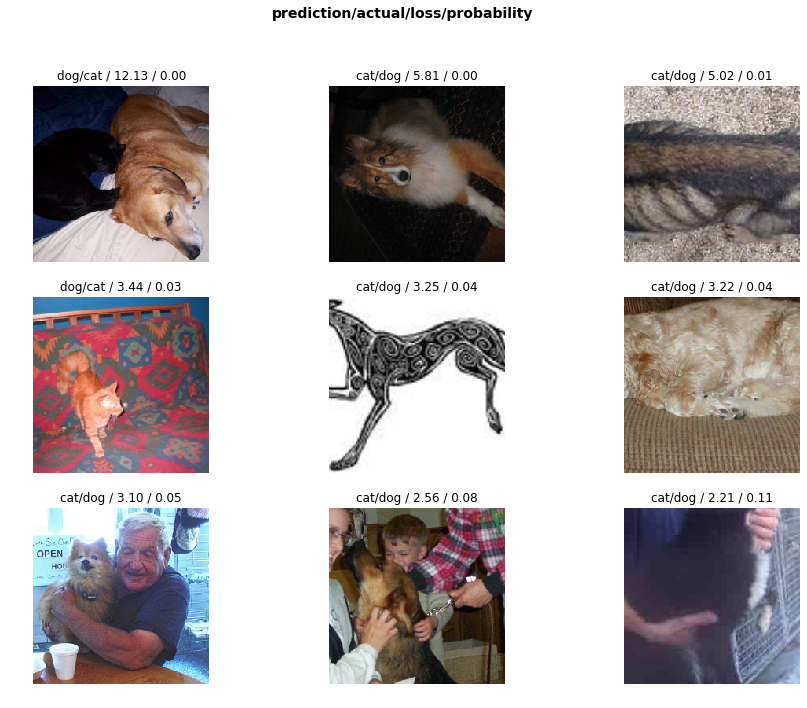

In [48]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [49]:
interp.most_confused(min_val=2)

[('dog', 'cat', 17), ('cat', 'dog', 7)]

### Stage 3: Let's find MORE cat and dog images

In [64]:
# path.ls() # Should be '/content/gdrive/My Drive/Colab Notebooks/data/dogs-vs-cats'
# path_google = path/'from_google'


# !curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE

74.0.3729.6

In [77]:
# !pip install google_images_download
# !wget -N http://chromedriver.storage.googleapis.com/74.0.3729.6/chromedriver_linux64.zip -P content/gdrive/My Drive/Colab Notebooks/data/dogs-vs-cats/from_google
# !unzip path_google/chromedriver_linux64.zip -d path_google/
# !whereis chromedriver
# !googleimagesdownload -k "cat" -s medium -wr '{"time_min":"01/01/2019","time_max":"01/30/2019"}' -l 500 -o path_google -i train/cat -cd content/path_googe/chromedriver

--2019-05-01 11:43:45--  http://chromedriver.storage.googleapis.com/74.0.3729.6/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5065988 (4.8M) [application/zip]
Saving to: ‘content/gdrive/My/chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   4.83M  --.-KB/s    in 0.04s   

2019-05-01 11:43:45 (120 MB/s) - ‘content/gdrive/My/chromedriver_linux64.zip’ saved [5065988/5065988]

--2019-05-01 11:43:45--  http://drive/Colab
Resolving drive (drive)... failed: No address associated with hostname.
wget: unable to resolve host address ‘drive’
--2019-05-01 11:43:45--  http://notebooks/data/dogs-vs-cats/from_google
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable t